<a href="https://colab.research.google.com/github/Priangshu-18/Face-Mask-Detection-System-using-CNN/blob/main/Face_Mask_Detection_System_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the face mask dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 70% 115M/163M [00:00<00:00, 1.20GB/s]
100% 163M/163M [00:00<00:00, 1.00GB/s]


In [4]:
# Extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the dependencies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1523.jpg', 'with_mask_2917.jpg', 'with_mask_1563.jpg', 'with_mask_1175.jpg', 'with_mask_1651.jpg']
['with_mask_234.jpg', 'with_mask_1983.jpg', 'with_mask_329.jpg', 'with_mask_2423.jpg', 'with_mask_854.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3569.jpg', 'without_mask_41.jpg', 'without_mask_29.jpg', 'without_mask_2666.jpg', 'without_mask_3328.jpg']
['without_mask_3451.jpg', 'without_mask_73.jpg', 'without_mask_2238.jpg', 'without_mask_388.jpg', 'without_mask_2261.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Label for the two class

with mask --> 1

without mask --> 2

In [10]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

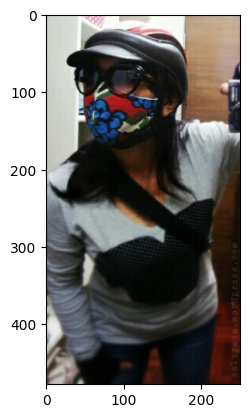

In [12]:
# Displaying with mask images
img = mping.imread('/content/data/with_mask/with_mask_3241.jpg')
imgplot = plt.imshow(img)
plt.show()

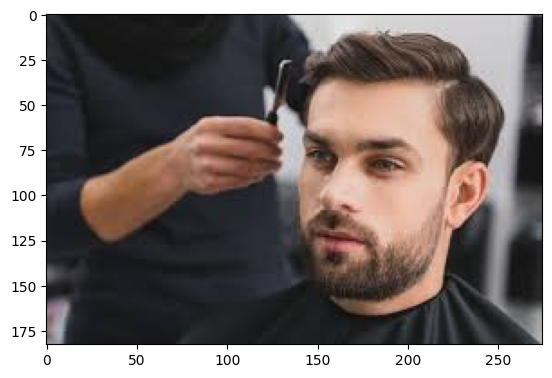

In [13]:
# Displaying without mask images
img = mping.imread('/content/data/without_mask/without_mask_3409.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. Resize the image

2. Convert the images into numpy array

In [14]:
data = []

with_mask_path = '/content/data/with_mask/'

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
len(data)

7553

In [16]:
type(data)

list

array([[[216, 237, 249],
        [224, 243, 251],
        [230, 248, 248],
        ...,
        [  7,  46,  83],
        [  7,  49,  89],
        [  7,  51,  93]],

       [[219, 236, 248],
        [226, 243, 249],
        [234, 251, 250],
        ...,
        [  3,  49,  87],
        [  2,  51,  92],
        [  4,  54,  96]],

       [[221, 238, 251],
        [227, 244, 252],
        [231, 249, 251],
        ...,
        [  4,  54,  94],
        [  4,  57, 100],
        [  3,  59, 103]],

       ...,

       [[ 81, 147, 217],
        [ 79, 148, 213],
        [ 80, 150, 213],
        ...,
        [ 13,  54,  95],
        [ 12,  44,  89],
        [ 18,  42,  92]],

       [[ 64, 132, 207],
        [ 61, 134, 201],
        [ 59, 137, 199],
        ...,
        [  2,  59,  92],
        [  5,  61,  95],
        [ 20,  77, 114]],

       [[ 46, 121, 194],
        [ 46, 122, 190],
        [ 46, 124, 187],
        ...,
        [ 17,  93, 128],
        [ 32, 109, 144],
        [ 59, 141, 175]]], dtype=uint8)
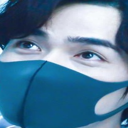

In [17]:
data[0]

In [18]:
data[0].shape

(128, 128, 3)

In [19]:
# Converting the image list and label list to numpy array

X = np.array(data)
Y = np.array(labels)

In [20]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Train Test Split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [23]:
# Scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [24]:
print(X_train_scaled)

[[[[0.11372549 0.04313725 0.03529412]
   [0.08235294 0.03137255 0.01960784]
   [0.07058824 0.03529412 0.01568627]
   ...
   [0.49019608 0.37254902 0.39215686]
   [0.49803922 0.36862745 0.39215686]
   [0.50588235 0.36862745 0.39215686]]

  [[0.09803922 0.03529412 0.03529412]
   [0.08627451 0.03529412 0.02745098]
   [0.07843137 0.03921569 0.02745098]
   ...
   [0.48235294 0.38039216 0.4       ]
   [0.48627451 0.37647059 0.4       ]
   [0.49411765 0.37254902 0.4       ]]

  [[0.07843137 0.03529412 0.03529412]
   [0.09019608 0.03529412 0.03921569]
   [0.09019608 0.03529412 0.03921569]
   ...
   [0.47843137 0.40392157 0.42352941]
   [0.47843137 0.39607843 0.41568627]
   [0.48235294 0.39215686 0.41568627]]

  ...

  [[0.45098039 0.38431373 0.41960784]
   [0.45098039 0.38431373 0.40784314]
   [0.44705882 0.38431373 0.39215686]
   ...
   [0.34901961 0.15294118 0.14117647]
   [0.39607843 0.2        0.16862745]
   [0.44313725 0.24313725 0.21568627]]

  [[0.44705882 0.38039216 0.41568627]
   [0.4

Building a Neural Network (CNN)

In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [30]:
# Training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 131s 744ms/step - acc: 0.7133 - loss: 0.6557 - val_acc: 0.8793 - val_loss: 0.2909
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 139s 727ms/step - acc: 0.8679 - loss: 0.3317 - val_acc: 0.8975 - val_loss: 0.2492
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 143s 735ms/step - acc: 0.9058 - loss: 0.2442 - val_acc: 0.9207 - val_loss: 0.2529
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 142s 733ms/step - acc: 0.9261 - loss: 0.1853 - val_acc: 0.9223 - val_loss: 0.1901
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 142s 735ms/step - acc: 0.9395 - loss: 0.1681 - val_acc: 0.9289 - val_loss: 0.1718


Model Evaluation

In [31]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - acc: 0.9141 - loss: 0.2506
Test Accuracy = 0.9179351329803467


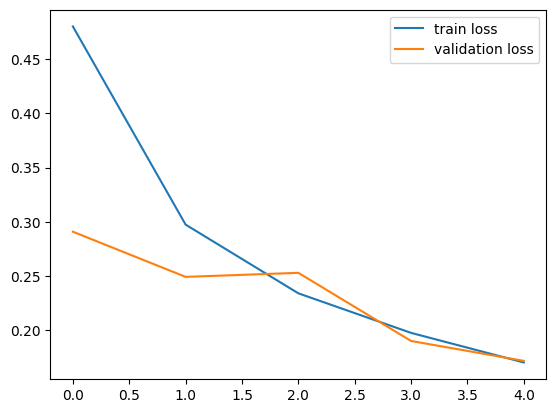

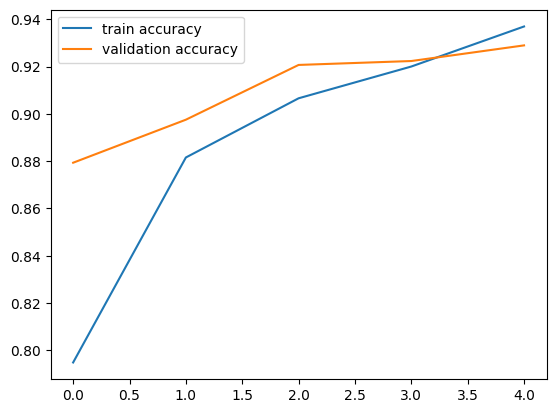

In [32]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/mask.webp


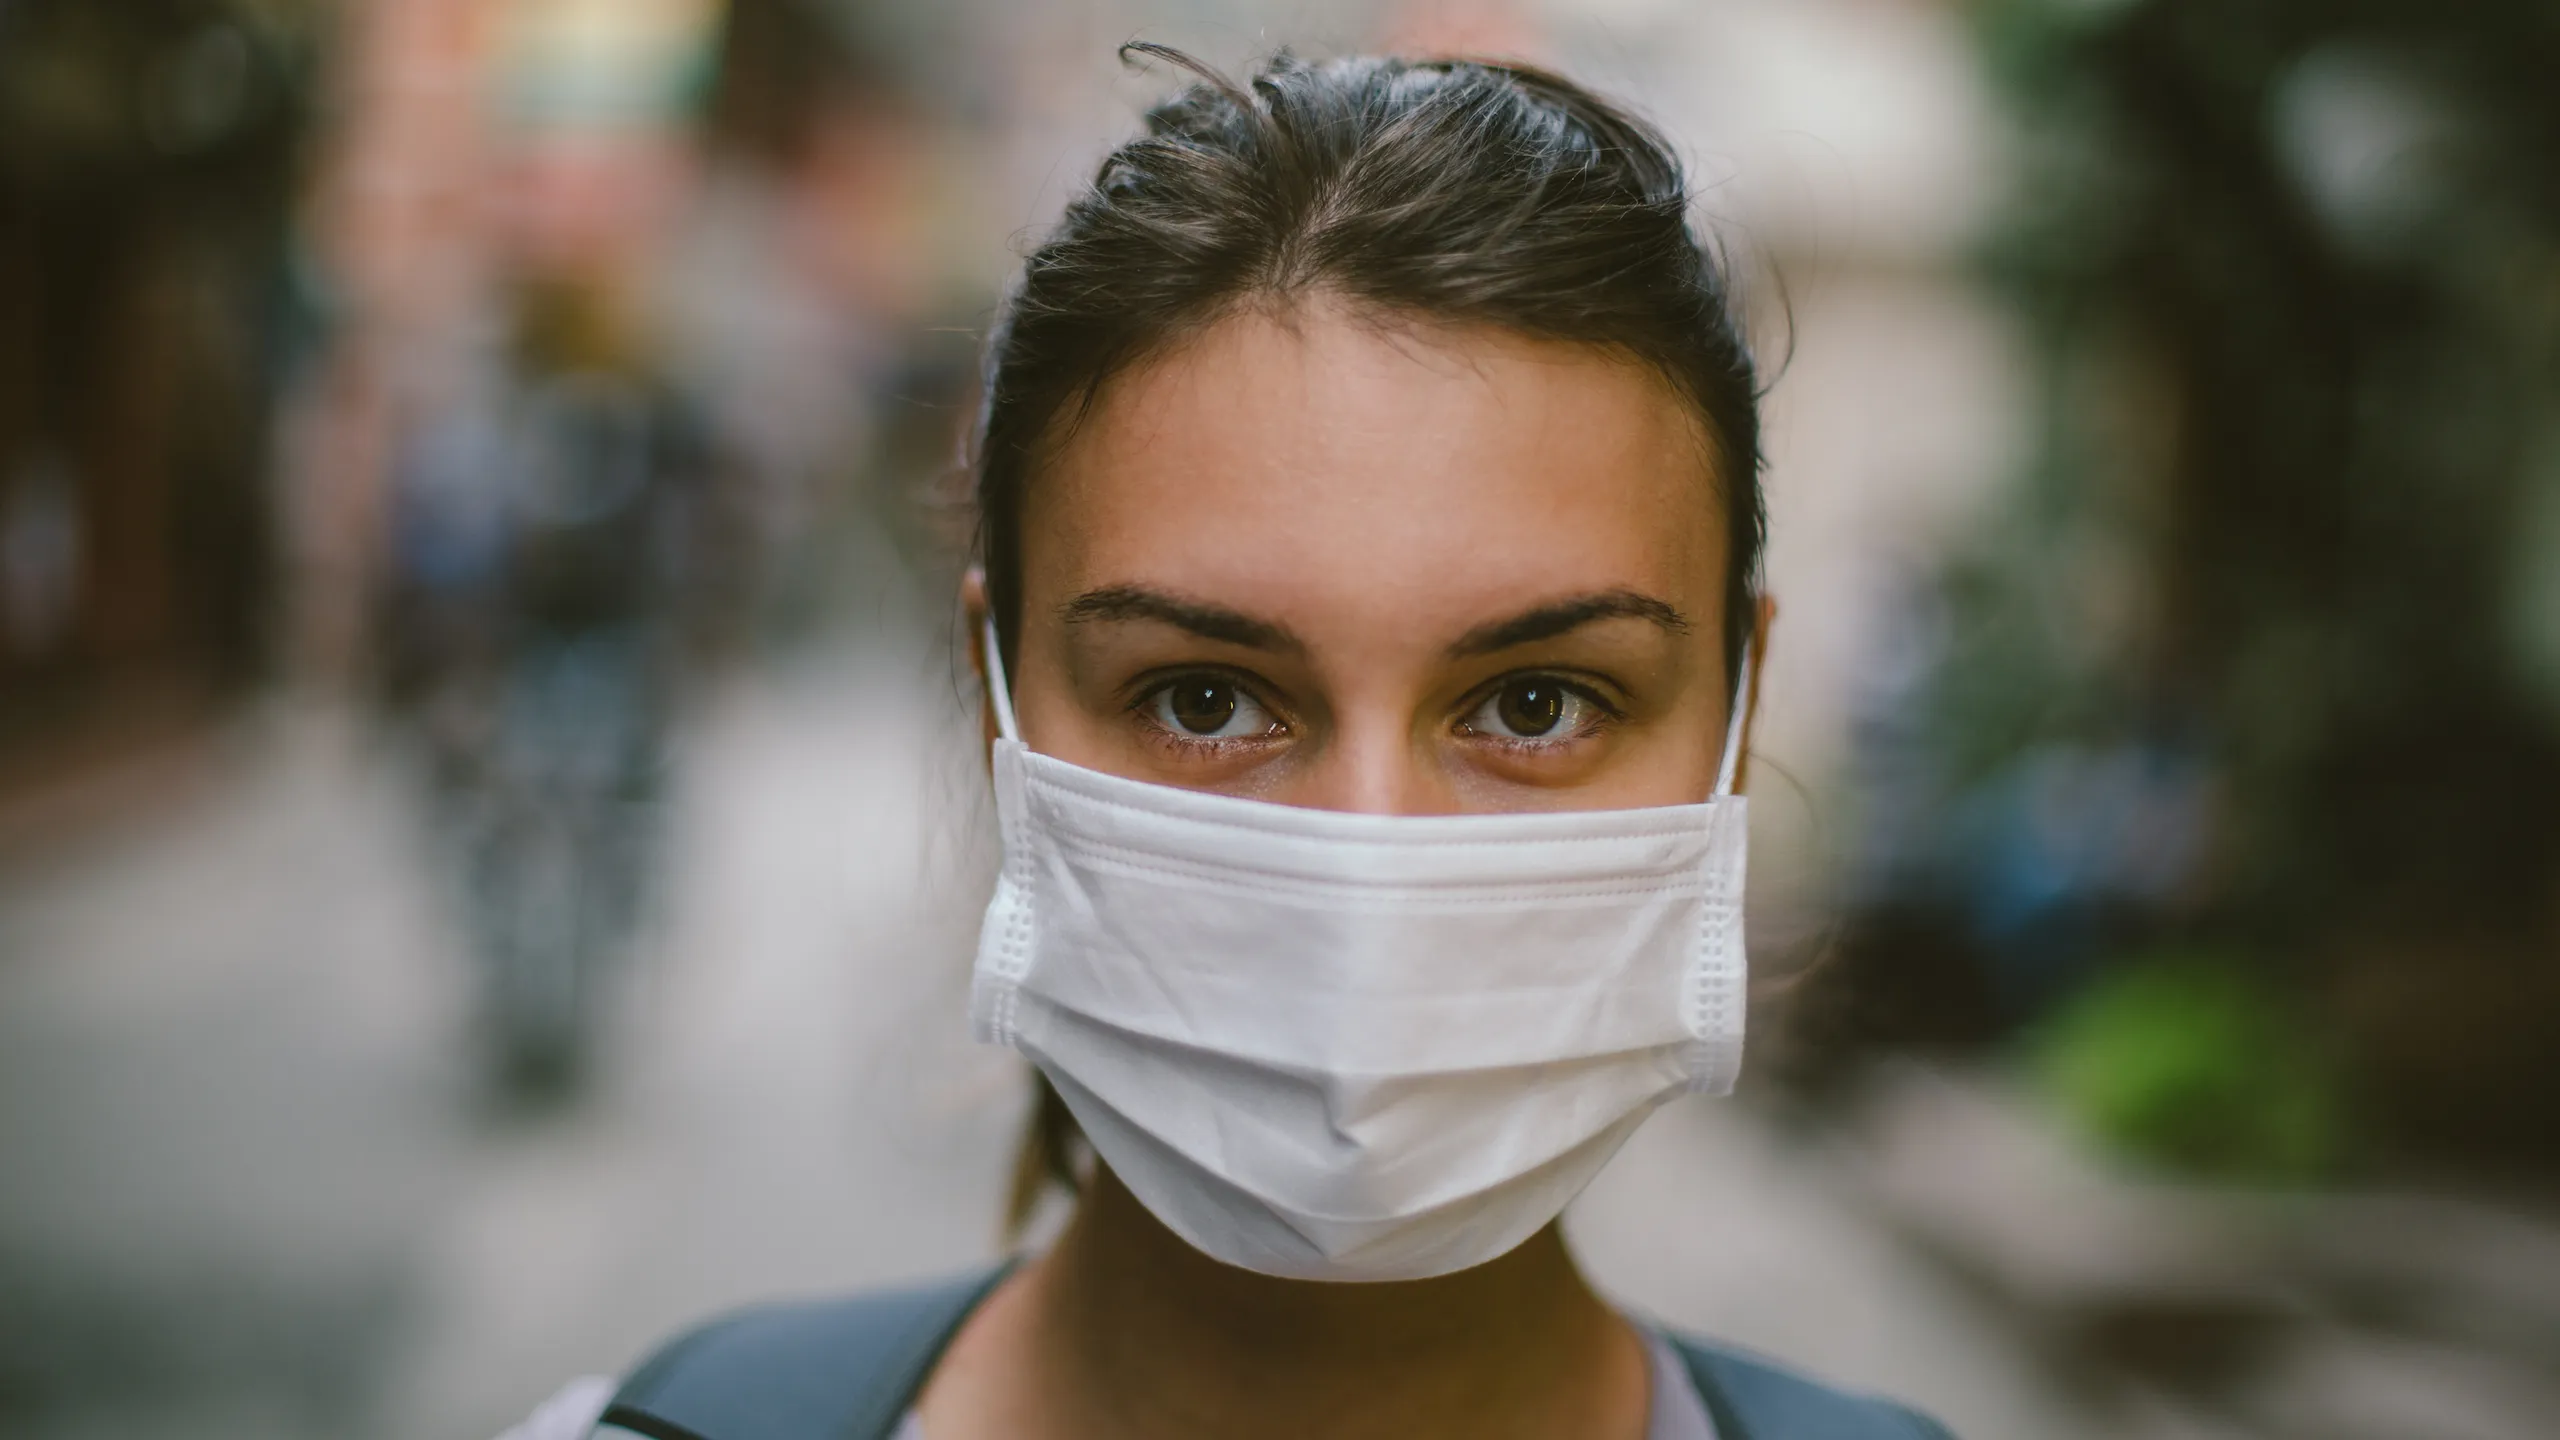

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[0.48182577 0.4846568 ]]
1
The person in the image is wearing a mask


In [34]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')